In [1]:
pip install pytearcat

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pytearcat as pt

/home/condorbox/miniconda3/envs/relativity/lib/python3.11/site-packages/pytearcat/tensor/core/core.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
help(pt.metric)

Help on function create_metric in module pytearcat.gr.metric:

create_metric(ds2='')
    It defines the metric. 
    
    Parameters
    ----------
    ds2 : str
        string indicating line element representing the metric to be used
    
    Raises
    ------
    TypeError
        If the argument received is not a string.
    
    Examples
    --------
    
    >>> # Define the coordinates to be used
    >>> t,x,y,z = pt.coords('t,x,y,z')
    >>> # Define any constant (more than one constant can be defined at the same time)
    >>> a = pt.fun('a','t')
    >>> g = pt.metric('ds2 = -dt**2 + a**2*(dx**2 + dy**2 + dz**2)')
    
    Remember that the time coordinate must be the first coordinate.
    
    Dimension = 4
    
    Coordinates = t,x,y,z
    
    Metric defined successfully: 
    
    .. math::
        ds^2 = -1 \cdot dt^2+a^{2}{\left(t \right)} \cdot dx^2+a^{2}{\left(t \right)} \cdot dy^2+a^{2}{\left(t \right)} \cdot dz^2
    
    .. math::
        \displaystyle \left[\begin{

In [4]:
u,v=pt.coords('u,v')

Remember that the time coordinate must be the first coordinate.


In [5]:
rho,R=pt.con('rho','R')

In [6]:
ds='ds2=rho**2*du**2+(R+rho*cos(u))**2*dv**2'

In [7]:
g=pt.metric(ds)


Dimension = 2
Coordinates = u,v
Metric defined successfully: 



<IPython.core.display.Math object>

Matrix([
[rho**2,                                        0],
[     0, R**2 + 2*R*rho*cos(u) + rho**2*cos(u)**2]])

In [8]:
Ric=pt.ricci()

<IPython.core.display.Latex object>

  0%|          | 0/8 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

  0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

  0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
Ric.display("_,_",aslist=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
S=pt.riccis()

  0%|          | 0/4 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

In [11]:
pt.display(S)

<IPython.core.display.Math object>

  0%|          | 0/8 [00:00<?, ?it/s]

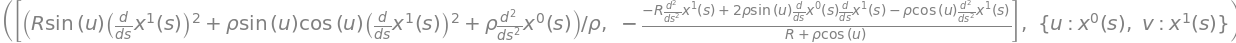

In [12]:
pt.geodesic()

In [12]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

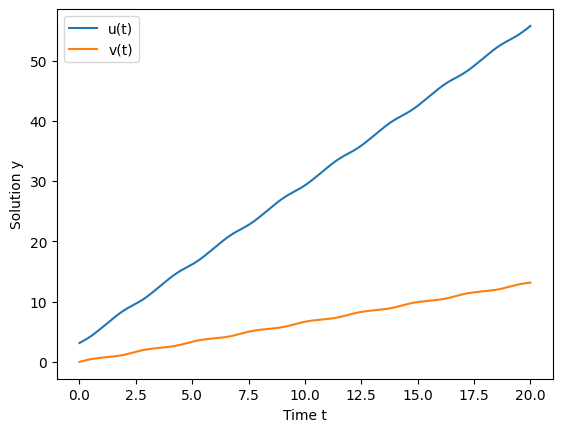

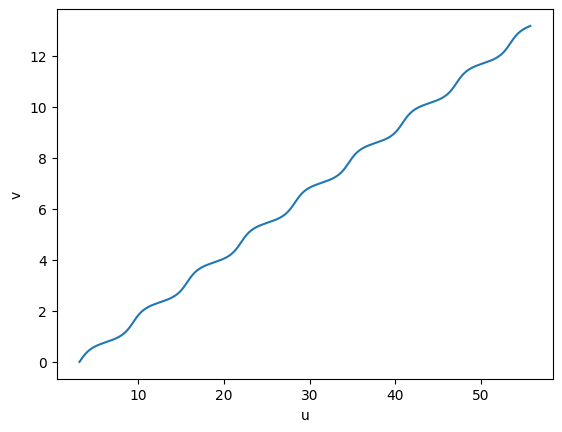

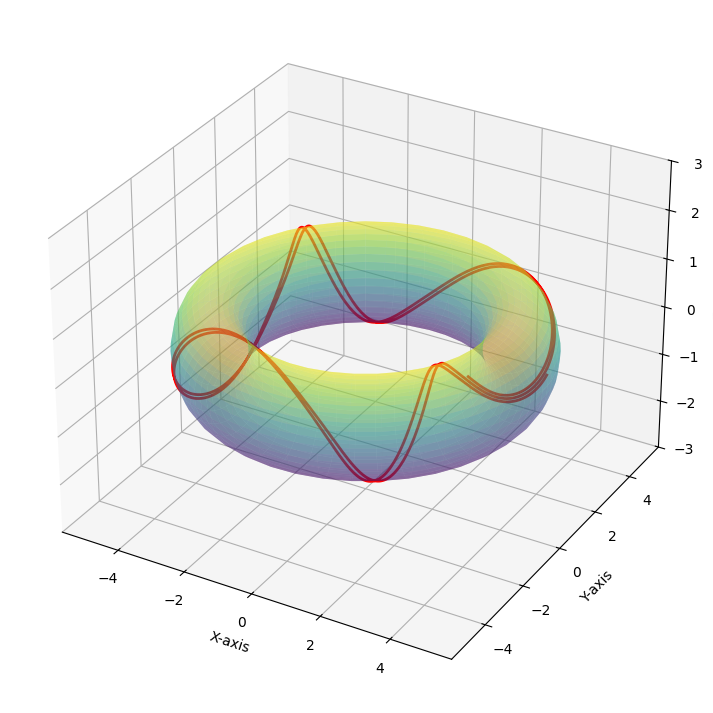

In [13]:
R, rho =4, 1

def geodesiques(t, y):
    return [y[1], -R/rho *np.sin(y[0])*(y[3])**2-np.sin(y[0])*np.cos(y[0])*(y[3])**2,y[3],2*rho*np.sin(y[0])*y[1]*y[3]/(R+rho*np.cos(y[0]))]

# Initial conditions:
y0 = [np.pi, 2, 0,1]

# Time span: from 0 to 10
t_start = 0.
t_end = 20.
t_pts = np.linspace(t_start, t_end, 1000)
abserr = 1.e-10
relerr = 1.e-10
#t_span = (0, 1000)
#t_eval = np.linspace(0, 1000, 1000)

# Solve the system
sol = solve_ivp(geodesiques, (t_start, t_end), y0, t_eval=t_pts,rtol=relerr, atol=abserr)
 # solve_ivp( function for rhs with (t, v) argument (cf. (v,t) for odeint),
    #            tspan=(starting t value, ending t value),
    #            initial value of y[0], array of points we want to know y,
    #            method='RK45' is the default method,
    #            rtol=1.e-3, atol=1.e-6 are default tolerances
    #          )


# Plot the results
plt.plot(sol.t, sol.y[0], label='u(t)')
plt.plot(sol.t, sol.y[2], label='v(t)')
plt.xlabel('Time t')
plt.ylabel('Solution y')
plt.legend()
#plt.show()


n=40

theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, n)
theta, phi = np.meshgrid(theta, phi)
x = (R + rho*np.cos(theta)) * np.cos(phi)
y = (R + rho*np.cos(theta)) * np.sin(phi)
z = rho * np.sin(theta)



# Create data for the curve
x_curve =  (R + rho*np.cos(sol.y[0])) * np.cos(sol.y[2])
y_curve = (R + rho*np.cos(sol.y[0])) * np.sin(sol.y[2])
z_curve = rho * np.sin(sol.y[0])

# 2D projection
fig = plt.figure("flat_torus")
ax = fig.add_subplot()
#ax.set_label("2D version of the torus")
ax.set_xlabel("u")
ax.set_ylabel("v")
#ax.set_xlim(0, 2*np.pi)
#ax.set_ylim(0, 2*np.pi)
ax.plot(sol.y[0] , sol.y[2])

# 3D immersion
fig = plt.figure(figsize =(9, 9))
ax = fig.add_subplot(projection='3d')
ax.set_zlim(-3,3)
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.4)
#ax.view_init(36, 26)
#plt.show()


# Plot the curve
ax.plot(x_curve, y_curve, z_curve, color='r', linewidth=2)

# Set labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()


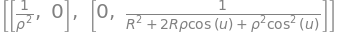

In [15]:
# Inversa de la métrica
g.tensor[3]

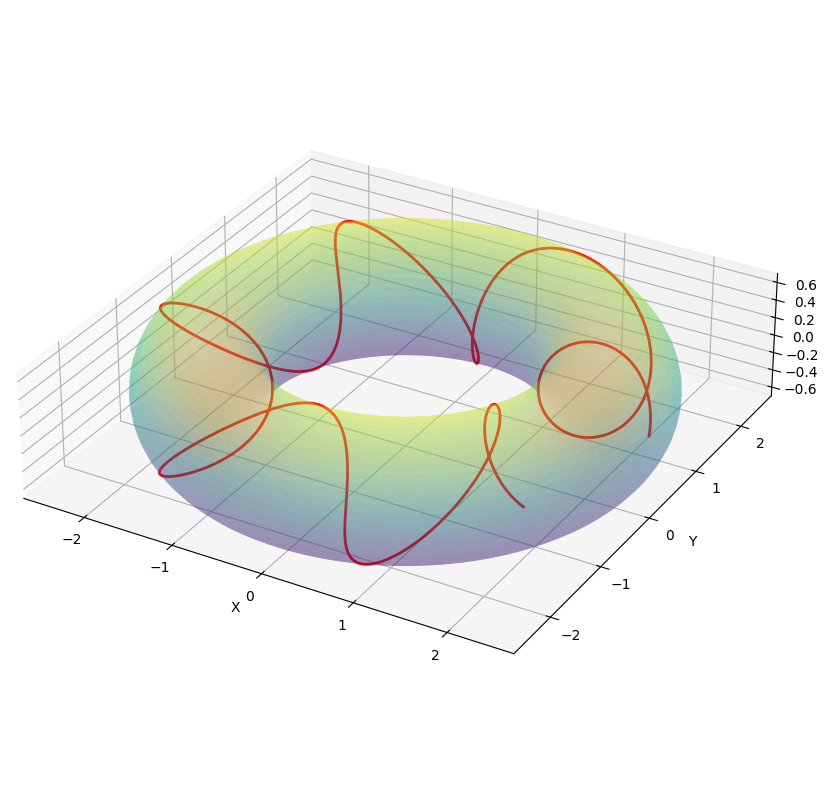

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# =========================
# Torus parameters
# =========================
R = 2.0     # major radius
r = 0.7     # minor radius

# =========================
# Geodesic system
# =========================
def geodesic(t, Y):
    u, up, v, vp = Y
    
    du = up
    dup = -((R + r*np.cos(u)) * np.sin(u) / r) * vp**2  
    dv = vp
    dvp = -2*(r*np.sin(u)/(R + r*np.cos(u))) * up * vp   
    
    return [du, dup, dv, dvp]

# =========================
# Initial conditions
# =========================

u0 = 0.3
v0 = 0.0

alpha = np.pi/4   # initial angle
# alpha = np.pi/6
# alpha = np.pi/3
# alpha = 0.1
# alpha = 1.2

a = np.cos(alpha)/r
b = np.sin(alpha)/(R + r*np.cos(u0))

Y0 = [u0, a, v0, b]

T = 40

# =========================
# Numerical integration
# =========================

sol = solve_ivp(geodesic, [0, T], Y0, max_step=0.01)

u = sol.y[0]
v = sol.y[2]

# =========================
# Convert to 3D coordinates
# =========================

def torus(u,v):
    x = (R + r*np.cos(u))*np.cos(v)
    y = (R + r*np.cos(u))*np.sin(v)
    z = r*np.sin(u)
    return x,y,z

x,y,z = torus(u,v)

# =========================
# Plot torus + geodesic
# =========================

# Torus mesh
U = np.linspace(0, 2*np.pi, 200)
V = np.linspace(0, 2*np.pi, 200)
U, V = np.meshgrid(U, V)

X = (R + r*np.cos(U))*np.cos(V)
Y = (R + r*np.cos(U))*np.sin(V)
Z = r*np.sin(U)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, 
                alpha=0.3,
                cmap='viridis',
                edgecolor='none')

ax.plot(x, y, z, linewidth=2, color='red')

ax.set_zlim(-r, r)
ax.set_xlim(-(R+r), R+r)
ax.set_ylim(-(R+r), R+r)
ax.set_box_aspect([2*(R+r), 2*(R+r), 2*r])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.tight_layout()
plt.show()

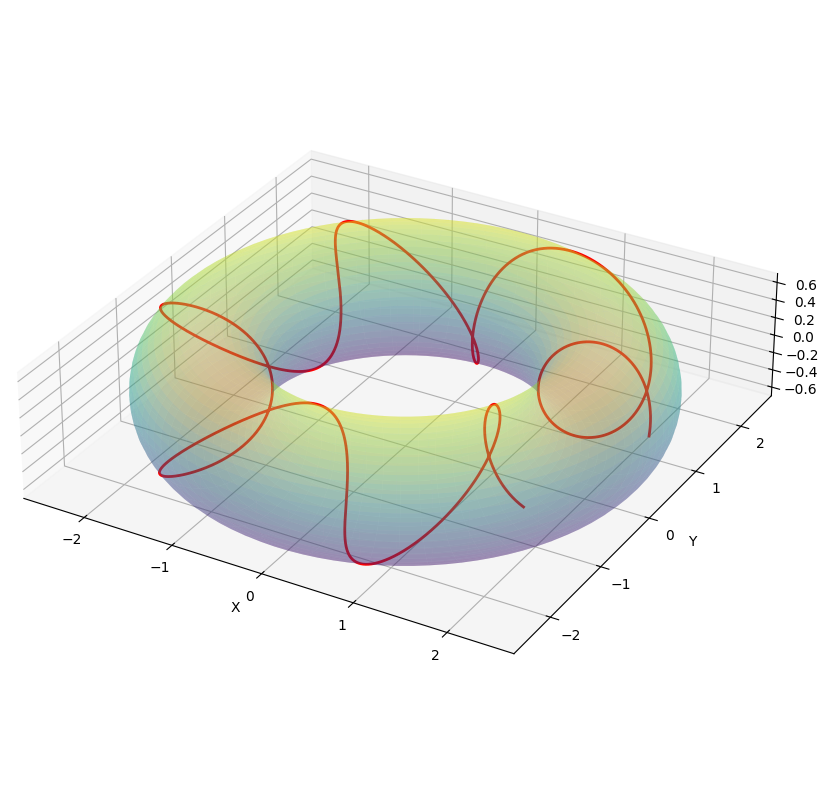

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# =====================================
# Torus parameters
# =====================================
R = 2.0
r = 0.7

# =====================================
# Geodesic system in first order form
# Y = [u, u', v, v']
# =====================================
def geodesic(t, Y):
    u, up, v, vp = Y
    du = up
    dup = -((R + r*np.cos(u)) * np.sin(u) / r) * vp**2
    dv = vp
    dvp = -2*(r*np.sin(u)/(R + r*np.cos(u))) * up * vp
    return np.array([du, dup, dv, dvp])

# =====================================
# Runge-Kutta 4
# =====================================
def runge_kutta_4(f, t0, y0, t_end, h):
    n_steps = int((t_end - t0) / h) + 1
    t = np.linspace(t0, t_end, n_steps)
    y = np.zeros((n_steps, len(y0)))
    y[0] = y0
    for i in range(n_steps - 1):
        k1 = h * np.array(f(t[i],       y[i]))
        k2 = h * np.array(f(t[i] + h/2, y[i] + k1/2))
        k3 = h * np.array(f(t[i] + h/2, y[i] + k2/2))
        k4 = h * np.array(f(t[i] + h,   y[i] + k3))
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, y

# =====================================
# Initial conditions (angle α)
# =====================================
u0    = 0.3
v0    = 0.0

alpha = np.pi/4   # initial angle
# alpha = np.pi/6
# alpha = np.pi/3
# alpha = 0.1
# alpha = 1.2

a = np.cos(alpha) / r
b = np.sin(alpha) / (R + r*np.cos(u0))
Y0 = np.array([u0, a, v0, b])

# =====================================
# Integration
# =====================================
t0    = 0
t_end = 40
h     = 0.01
t, sol = runge_kutta_4(geodesic, t0, Y0, t_end, h)

u = sol[:, 0]
v = sol[:, 2]

# =====================================
# Convert to 3D coordinates
# =====================================
def torus(u, v):
    x = (R + r*np.cos(u)) * np.cos(v)
    y = (R + r*np.cos(u)) * np.sin(v)
    z = r*np.sin(u)
    return x, y, z

x, y, z = torus(u, v)

# =====================================
# Draw torus + geodesic
# =====================================
U = np.linspace(0, 2*np.pi, 100)
V = np.linspace(0, 2*np.pi, 100)
U, V = np.meshgrid(U, V)
X = (R + r*np.cos(U)) * np.cos(V)
Y = (R + r*np.cos(U)) * np.sin(V)
Z = r*np.sin(U)

fig = plt.figure(figsize=(8, 8))
ax  = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.3, cmap='viridis', edgecolor='none')
ax.plot(x, y, z, linewidth=2, color='red')

ax.set_xlim(-(R+r), R+r)
ax.set_ylim(-(R+r), R+r)
ax.set_zlim(-r, r)
ax.set_box_aspect([2*(R+r), 2*(R+r), 2*r])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.show()